In [329]:
import nltk
import IPython.display as dp

In [330]:
#nltk.download()
#nltk.download('punkt')
#nltk.download('gutenberg')

## Задание 1

In [331]:
# загружаем текст
book_name = 'capital.txt'
f = open(book_name, encoding="utf8")
raw = f.read()
num_char = len(raw)

words = nltk.word_tokenize(raw)
# оставляем только те слова, которые полностью состоят из букв, чтобы избавиться от знаков пунктуации и мусора
words = [w for w in words if w.isalpha()]
# преобразуем слова в нижний регистр
words = [w.lower() for w in words]
# по хорошему тут еще нужно сделать стемминг, чтобы более точно оценить лексическое разнообразие
# TODO
word_count = len(words)
# создаём объект текста из предварительно обработанных слов
clean_text = nltk.Text(words)

# преобразуем слова из списка в множество, тем самым оставляем только уникальные
unique_words = set(words)
unique_word_count = len(unique_words)

sents = nltk.sent_tokenize(raw)
sents_count = len(sents)

print(f'Статистика по файлу {book_name}')
print('\tКоличество слов в тексте:', word_count)
print('\tКоличество уникальных слов в тексте:', unique_word_count)
print('\tКоличество предложений в тексте:', sents_count)
print(f'\tСредняя длина слова {int(num_char/word_count)} букв')
print(f'\tСредняя длина предложения {round(word_count/sents_count)} слов')
print('\tЛексическое разнообразие:', unique_word_count / word_count)
print(f'\tВ среднем одно слово встречается {int(word_count/unique_word_count)} раз')

Статистика по файлу capital.txt
	Количество слов в тексте: 84376
	Количество уникальных слов в тексте: 6595
	Количество предложений в тексте: 3136
	Средняя длина слова 6 букв
	Средняя длина предложения 27 слов
	Лексическое разнообразие: 0.07816203659808477
	В среднем одно слово встречается 12 раз


In [332]:
stopwords = set(nltk.corpus.stopwords.words('english'))
# удаляем стопслова, как разность между множествами
unique_words = unique_words - stopwords
print(len(unique_words))

6472


In [333]:
# оставляем только нормальные слова, которые есть в словаре, как пересечение множеств
# имеет смысл делать, только если был выполнен стемминг, потому что иначе удалится слишком много слов
# all_english_words = set(nltk.corpus.words.words())
# unique_words = unique_words & all_english_words
# print(len(unique_words))

In [334]:
# Узнаём частоту встречаемости каждого слова в тексте
words_freq = nltk.FreqDist(clean_text)
# Узнаём часть речи каждого слова
parts_of_speech = dict(nltk.pos_tag(unique_words))

# создаём массив кортежей вида [(слово, частота, часть речи)]
words_info = [(w, words_freq[w], parts_of_speech[w]) for w in unique_words]
print(words_info[:5])

[('comes', 25, 'VBZ'), ('werden', 3, 'JJ'), ('estates', 2, 'NNS'), ('varia', 2, 'VBP'), ('trademark', 10, 'NN')]


In [335]:
# выполняем сортировку по второму элементу кортежа - частоты, reverse означает сортировку по убыванию
words_info.sort(key=lambda w: w[1], reverse=True)

# выбираем первые элементы из кортежа
most_freq_words = [wi[0] for wi in words_info[:5]]
most_rare_words = [wi[0] for wi in words_info[-5:]]
median_idx = int(len(words_freq) / 2)
median_words = [wi[0] for wi in words_info[median_idx -3: median_idx + 2]] 

print('Самые частые слова:', most_freq_words)
print('Самые редкие слова:', most_rare_words)
print('Слова около медианы:', median_words)

Самые частые слова: ['money', 'value', 'gold', 'commodities', 'circulation']
Самые редкие слова: ['tied', 'valoir', 'kunst', 'selfe', 'trouverait']
Слова около медианы: ['forgotten', 'directions', 'materialistic', 'timely', 'potentialities']


In [336]:
def filter_words_by_part_of_speech1(words_info, parts_of_speech):
    return [(w, f, ps) for w, f, ps in words_info if ps in parts_of_speech]

def filter_words_by_part_of_speech2(word_info, parts_of_speech):
    result = []
    for w, f, ps in word_info:
        if ps in parts_of_speech:
            result.append((w, f, ps))
    return result

# теги я нашёл тут https://stackoverflow.com/questions/15388831/what-are-all-possible-pos-tags-of-nltk
# три разных способа сделать одно и тоже
nouns = filter_words_by_part_of_speech1(words_info, ['NN', 'NNS', 'NNP'])
adjectives = [(w, f, ps) for w, f, ps in words_info if ps == 'JJ' or ps == 'JJR' or ps == 'JJS']
verbs = filter_words_by_part_of_speech2(words_info, ['VBD', 'VBG', 'VBN', 'VBP', 'VBZ'])

print('Самые частые существительные', nouns[:5])
print('Самые частые прилагательные', adjectives[:5])
print('Самые частые глаголы', verbs[:5])

Самые частые существительные [('money', 809, 'NN'), ('value', 701, 'NN'), ('commodities', 614, 'NNS'), ('exchange', 521, 'NN'), ('commodity', 426, 'NN')]
Самые частые прилагательные [('gold', 644, 'JJ'), ('form', 334, 'JJ'), ('silver', 256, 'JJ'), ('process', 206, 'JJ'), ('first', 153, 'JJ')]
Самые частые глаголы [('circulation', 554, 'VBP'), ('means', 153, 'VBZ'), ('relation', 91, 'VBP'), ('appears', 91, 'VBZ'), ('determined', 79, 'VBN')]


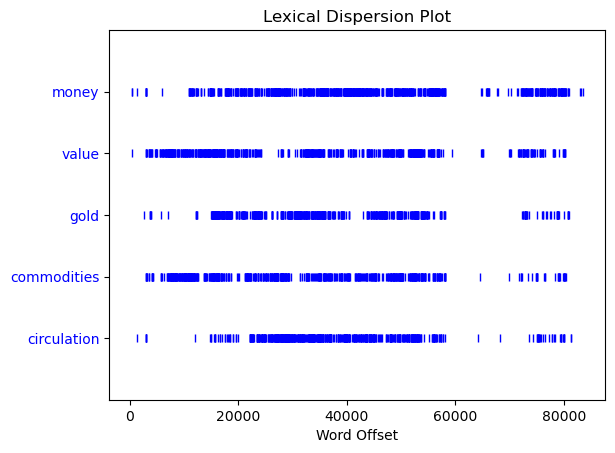

In [337]:
clean_text.dispersion_plot(most_freq_words)

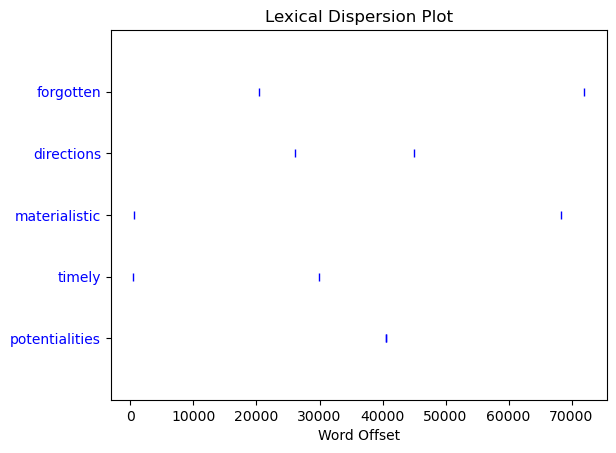

In [338]:
clean_text.dispersion_plot(median_words)

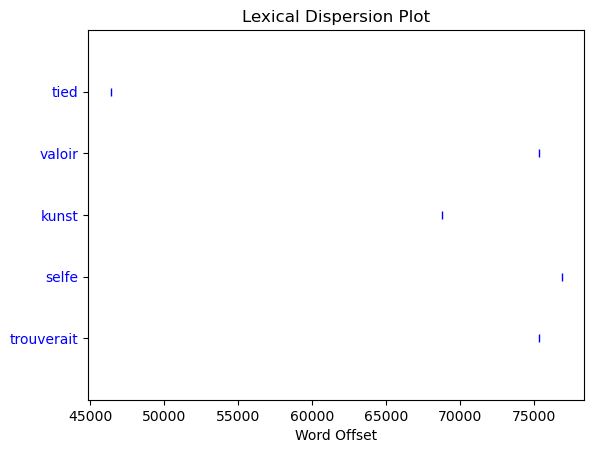

In [339]:
clean_text.dispersion_plot(most_rare_words)

## Задание 2

In [340]:
# https://www.nltk.org/api/nltk.tokenize.html

# предложения с 100 по 115 попадают на содержание, поэтому возьму предложения с 1100 по 115
selected_sents = sents[1100:1116]
# преобразуем обратно в текст выбранные предложения
selected_raw = ' '.join(selected_sents)

# Очищаем текст от новых строк
selected_sents = [s.replace("\n", "") for s in selected_sents]

selected_sents[:2]
selected_words = nltk.tokenize.NLTKWordTokenizer().tokenize(selected_sents[0])

In [382]:
# Делаю вывод в виде HTML, чтобы он был красивый и поместился в блок
def display_big_text(title, long_txt):
    outp = dp.HTML(
    '''
    <style>
    p {
        max_height:1000px !important;
        white-space: pre-wrap;
    }
    .container {
        display: grid;
        grid-template-columns: repeat(3, 1fr);
    }
    .block {
        display:block;
        margin-left: 25px;
    }
    .overflow {
        height: 300px;
        overflow-y: scroll;
    }
    </style>
    ''' + f'<h1>{title}</h1><h3 class=\'container\'>{long_txt}</h3>'
    )
    return outp

def test_tokenizers(data, tokenizers, disp_tokens = 5):
    output = ''
    # для каждого токенизатора
    for tokenizer in tokenizers:

        output += "<p class='overflow'>"
        output += f"<span style='color:lightcoral'>Используется токенизатор: {tokenizer.__class__.__name__}</span>\n"

        # для каждого текста/предложения/слова запускаем токенезатор
        for i, s in enumerate(data):
            tokens = tokenizer.tokenize(s)

            output += f"<span style='color:lightgreen'>  Предложение {i+1}. Количество токенов: {len(tokens)}\n</span>"
            output += "<span class='block'>"

            # каждый токен визуализируем
            for j, t in enumerate(tokens[:disp_tokens]):
                t = t.replace("\n", "")
                output += f"<span style='color:lightblue'>{j+1}</span>. {t}\n"
            output += '</span>'
        output += '</p>'
    return output

def test_tokenizers_print(data, tokenizers, disp_tokens = 5):
    # для каждого токенизатора
    for tokenizer in tokenizers:
        print('Используется токенизатор:', tokenizer.__class__.__name__)

        # для каждого текста/предложения/слова запускаем токенезатор
        for i, s in enumerate(data):
            tokens = tokenizer.tokenize(s)
            print(f"    Предложение {i+1}. Количество токенов: {len(tokens)}")

            # каждый токен визуализируем
            print(end='\t')
            for j, t in enumerate(tokens[:disp_tokens]):
                t = t.replace("\n", "")
                print(f"{j+1}. {t[:30]}", end=' | ')
            print()

In [369]:
# токенизаторы, работающие на коротких предложениях
sents_tokenizers = [
    # Улучшенная версия TreebankWordTokenizer, нужно, чтобы текст уже был разбит на предложения. Обрабатывает многие сокращения.
    # Применение регулярных выражений изменит исходный текст без возможности восстановления
    nltk.tokenize.NLTKWordTokenizer(),

    # SExprTokenizer используется для поиска выражений в скобках в строке.
    # В частности, он делит строку на последовательность подстрок, которые являются либо выражениями в скобках (включая любые вложенные выражения в скобках)
    nltk.SExprTokenizer(),

    # RegexpTokenizer разбивает строку на подстроки, используя регулярное выражение.
    # Например, следующий токенизатор формирует токены из буквенных последовательностей, денежных выражений и любых других последовательностей, не содержащих пробелов:
    nltk.RegexpTokenizer('\w+|\$[\d\.]+|\S+'),

    # Токенезирует строку, используя пробел в качестве разделителя, который совпадает с s.split(' ').
    nltk.tokenize.SpaceTokenizer(),

    # На вход которого подается по одному предложению. Работа токенизатора основана на последовательном
    # применении к исходному тексту списка регулярных выражений. Не всегда отделяет знаки препинания от слов.
    nltk.ToktokTokenizer(),

    # В лингвистике Treebank – это проанализированный текстовый корпус, который аннотирует синтаксическую или семантическую структуру предложения.
    # Разделяются стандартные сокращения для английского языка, большинство знаков препинания, разделяются на отдельные токены;
    nltk.TreebankWordTokenizer(),

    # Поддержка коротких сообщений в Twitter (смайлики, как текстовые, так и обычные, теги пользователей и т.п.)
    nltk.tokenize.TweetTokenizer(),
]

display_big_text('Sents tokenizers', test_tokenizers(selected_sents, sents_tokenizers))

In [376]:
test_tokenizers_print(selected_sents[:3], sents_tokenizers)

Используется токенизатор: NLTKWordTokenizer
    Предложение 1. Количество токенов: 61
	1. Just | 2. as | 3. gold | 4. coin | 5. is | 
    Предложение 2. Количество токенов: 20
	1. In | 2. England | 3. e.g. | 4. copper | 5. is | 
    Предложение 3. Количество токенов: 58
	1. If | 2. silver | 3. and | 4. copper | 5. tokens | 
Используется токенизатор: SExprTokenizer
    Предложение 1. Количество токенов: 1
	1. Just as gold coin is prevented frompermanently ret | 
    Предложение 2. Количество токенов: 1
	1. In England e.g. copper is legal tender only to the | 
    Предложение 3. Количество токенов: 1
	1. If silver and copper tokens were to be issuedin gr | 
Используется токенизатор: RegexpTokenizer
    Предложение 1. Количество токенов: 61
	1. Just | 2. as | 3. gold | 4. coin | 5. is | 
    Предложение 2. Количество токенов: 21
	1. In | 2. England | 3. e | 4. .g. | 5. copper | 
    Предложение 3. Количество токенов: 57
	1. If | 2. silver | 3. and | 4. copper | 5. tokens | 
Используется т

In [343]:
# Токенизаторы, работающие на словах
words_tokenizers = [
    # Sonority Sequencing Principle (SSP). Принимает слово и разбивает его на слоги фонетически.
    nltk.SyllableTokenizer(),
    # Разбивает слова по слогам, основываясь на принципе правильности и максимизации наборов.
    # Конструктор принимает список доступных токенов и список всех гласных в языке. Принимает слово для токенизации.
    nltk.tokenize.LegalitySyllableTokenizer(nltk.corpus.words.words())
]

display_big_text('Words tokenizers', test_tokenizers(selected_words, words_tokenizers))

In [380]:
test_tokenizers_print(selected_words[5:10], words_tokenizers)

Используется токенизатор: SyllableTokenizer
    Предложение 1. Количество токенов: 3
	1. pre | 2. ven | 3. ted | 
    Предложение 2. Количество токенов: 5
	1. from | 2. per | 3. ma | 4. nen | 5. tly | 
    Предложение 3. Количество токенов: 3
	1. re | 2. tai | 3. ning | 
    Предложение 4. Количество токенов: 1
	1. its | 
    Предложение 5. Количество токенов: 2
	1. func | 2. tion | 
Используется токенизатор: LegalitySyllableTokenizer
    Предложение 1. Количество токенов: 3
	1. pre | 2. ven | 3. ted | 
    Предложение 2. Количество токенов: 5
	1. from | 2. per | 3. ma | 4. nent | 5. ly | 
    Предложение 3. Количество токенов: 4
	1. re | 2. ta | 3. i | 4. ning | 
    Предложение 4. Количество токенов: 1
	1. its | 
    Предложение 5. Количество токенов: 2
	1. funct | 2. ion | 


In [344]:
# Токенизаторы, работающие на тексте
text_tokenizers = [
    # PunktSentenceTokenizer делит текст на список предложений, используя неконтролируемый алгоритм для построения модели
    #  для слов-сокращений, словосочетаний и слов, с которых начинаются предложения.
    # Он должен быть обучен на большом наборе открытого текста на целевом языке, прежде чем его можно будет использовать.
    # Тут он загружется готовый, уже обученный для английского языка
    nltk.data.load('tokenizers/punkt/english.pickle'),

    # TextTiling – это метод автоматического разделения полноразмерных текстовых документов на последовательные блоки,
    # состоящие из нескольких абзацев, которые представляют собой отрывки или подтемы.
    # Алгоритм предполагает, что в ходе описания подтемы используется определенный набор слов, и когда подтема изменяется,
    # значительная часть словарного запаса также изменяется.
    # w (int) – размер псевдопредложения, на которые разбивается исходный текст; k (int) – размер блока (в предложениях),
    # Исходный текст можно очистить от стоп-слов, используя параметр stopwords
    nltk.TextTilingTokenizer(w=2, k=2, stopwords=stopwords)
]

display_big_text('Text tokenizers', test_tokenizers([selected_raw], text_tokenizers))

In [383]:
test_tokenizers_print([selected_raw], text_tokenizers)

Используется токенизатор: PunktSentenceTokenizer
    Предложение 1. Количество токенов: 16
	1. Just as gold coin is prevented | 2. In England e.g. copper is lega | 3. If silver and copper tokens we | 4. Thus in 1798 English copper co | 5. [79]The silver and copper toke | 
Используется токенизатор: TextTilingTokenizer
    Предложение 1. Количество токенов: 2
	1. Just as gold coin is prevented | 2. The silver and copper tokens w | 


In [345]:
tokenizer = nltk.tokenize.MWETokenizer([('a', 'little'), ('a', 'little', 'bit'), ('a', 'lot')])
tokenizer.add_mwe(('in', 'spite', 'of'))
tokenizer.tokenize('In a little or a little bit or a lot in sprite of'.split())

['In', 'a_little', 'or', 'a_little_bit', 'or', 'a_lot', 'in', 'sprite', 'of']